In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn import svm

# =============== Part 1: Loading and Visualizing Data ================

In [5]:
def plotData(x, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.plot(x[pos, 0], x[pos, 1], 'k+', lw=1, ms=7)
    plt.plot(x[neg, 0], x[neg, 1], 'ko', mfc='y', ms=7)

Loading and Visualizing Data ...


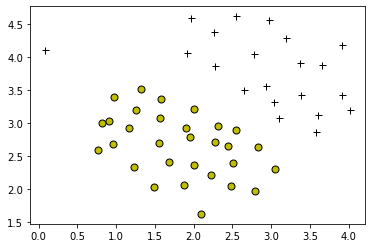

In [6]:
print('Loading and Visualizing Data ...')
datainfo = sio.loadmat('ex6/ex6data1.mat')
X = datainfo['X']
Y = datainfo['y'][:, 0]
plotData(X, Y)
plt.show()

# ==================== Part 2: Training Linear SVM ====================

In [7]:
def visualBoundaryLinear(x, y, theta, b):
    xp = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
    yp = -(theta[0]*xp+b)/theta[1]
    plotData(x, y)
    plt.plot(xp, yp, '-b')

Training Linear SVM ...


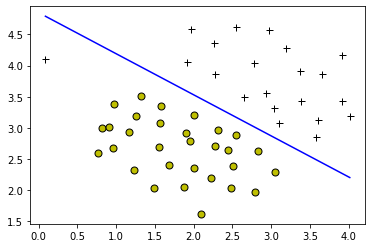

In [8]:
print('Training Linear SVM ...')
c = 1.0
clf = svm.SVC(C=c, kernel='linear')
clf.fit(X, Y)
theta = clf.coef_.flatten()
b = clf.intercept_
visualBoundaryLinear(X, Y, theta, b)
plt.show()

# =============== Part 3: Implementing Gaussian Kernel ===============

In [9]:
def gaussianKernel(x1, x2, sigma):
    sim = np.exp(-(x1-x2).dot(x1-x2)/(2*sigma**2))
    return sim

In [10]:
print('Evaluating the Gaussian Kernel ...')
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)
print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 0.5 :\
      \t%f\n(this value should be about 0.324652)' % sim)

Evaluating the Gaussian Kernel ...
Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 0.5 :      	0.324652
(this value should be about 0.324652)


# =============== Part 4: Visualizing Dataset 2 ================

Loading and Visualizing Data ...


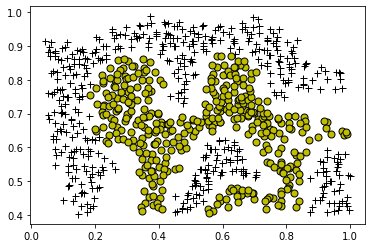

In [11]:
print('Loading and Visualizing Data ...')
datainfo = sio.loadmat('ex6/ex6data2.mat')
X = datainfo['X']
Y = datainfo['y'][:, 0]
plotData(X, Y)
plt.show()

# ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========

In [12]:
def visualBoundary(x, y, model):
    plotData(x, y)
    x1plot = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
    x2plot = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 100)
    x1, x2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(np.shape(x1))
    for i in range(np.size(x1, 1)):
        this_x = np.vstack((x1[:, i], x2[:, i])).T
        vals[:, i] = model.predict(this_x)
    plt.contour(x1, x2, vals, levels=[0], colors='b')

Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...


<ipython-input-12-f75cdacb41cf>:10: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, vals, levels=[0], colors='b')


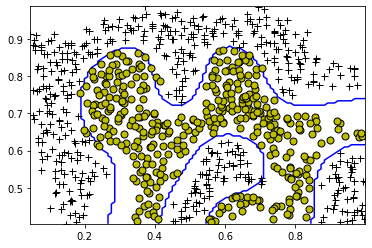

In [14]:
print('Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...')
c = 1; sigma = 0.1
gam = 1/(2*sigma**2)
clf = svm.SVC(kernel='rbf', C=1.0, gamma=gam)
clf.fit(X, Y)
visualBoundary(X, Y, clf)
plt.show()

# =============== Part 6: Visualizing Dataset 3 ================

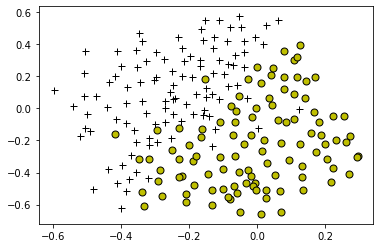

In [16]:
datainfo = sio.loadmat('ex6/ex6data3.mat')
X = datainfo['X']
Y = datainfo['y'][:, 0]
Xval = datainfo['Xval']
Yval = datainfo['yval'][:, 0]
plotData(X, Y)
plt.show()

# ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

In [17]:
def dataset3Params(x, y, xval, yval):
    c = 1; sigma = 0.3
    err_best = np.size(yval, 0)
    c_choice = [0.3, 1.0]
    sigma_choice = [0.1, 0.3]
    for i in range(len(c_choice)):
        for j in range(len(sigma_choice)):
            clf = svm.SVC(C=c_choice[i], gamma=1/(2*sigma_choice[j]**2))
            clf.fit(x, y)
            pred = clf.predict(xval)
            err = np.sum(pred != yval)/np.size(yval, 0)
            if err_best>err:
                err_best = err
                c = c_choice[i]
                sigma = sigma_choice[j]
    return c, sigma

<ipython-input-12-f75cdacb41cf>:10: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, vals, levels=[0], colors='b')


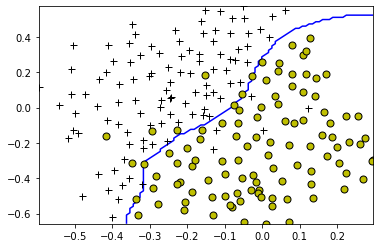

In [18]:
c, sigma = dataset3Params(X, Y, Xval, Yval)
clf = svm.SVC(C=c, gamma=1/(2*sigma**2))
clf = clf.fit(X, Y)
visualBoundary(X, Y, clf)
plt.show()